Based on:

http://sdsawtelle.github.io/blog/output/week9-anomaly-andrew-ng-machine-learning-with-python.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Load the data

In [2]:
!ls "datasets/"

anomaly_X.txt                    anomaly_complex_validation_y.txt
anomaly_complex_X.txt            anomaly_validation_X.txt
anomaly_complex_validation_X.txt anomaly_validation_y.txt


In [3]:
trash = np.loadtxt("datasets/anomaly_X.txt", delimiter=",")
X1 = np.loadtxt("datasets/anomaly_validation_X.txt", delimiter=",")
y1 = np.loadtxt("datasets/anomaly_validation_y.txt")
# y1_val = y1_val.reshape((len(y1_val), 1))

In [4]:
trash.shape

(307, 2)

In [5]:
X1.shape

(307, 2)

In [6]:
y1.shape

(307,)

In [7]:
X2_normal = np.loadtxt("datasets/anomaly_complex_X.txt", delimiter=",")
y2_normal = np.array([0] * len(X2_normal))
X2 = np.loadtxt("datasets/anomaly_complex_validation_X.txt", delimiter=",")
y2 = np.loadtxt("datasets/anomaly_complex_validation_y.txt")

In [8]:
X2_normal.shape

(1000, 11)

In [9]:
X2.shape

(100, 11)

In [10]:
y2.shape

(100,)

In [11]:
y2 = np.concatenate([y2, y2_normal])
X2 = np.concatenate([X2, X2_normal])

In [12]:
X1.shape, X2.shape

((307, 2), (1100, 11))

## Basic exploration

### 2d dataset

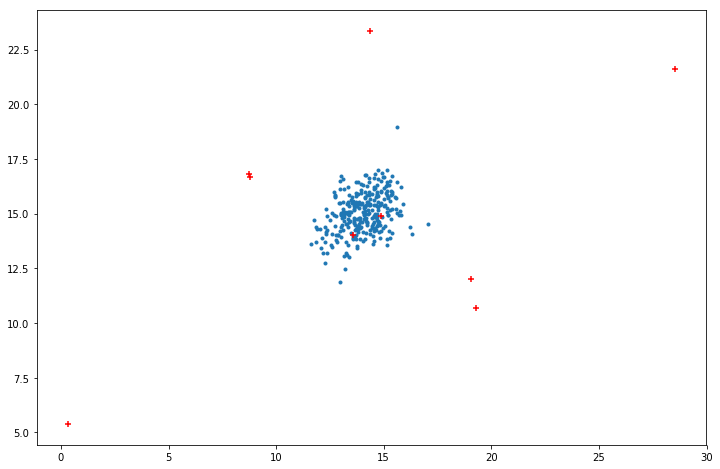

In [13]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], marker=".")
axes.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], color="red", marker="+")

### 3d dataset

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=3)

In [15]:
X_scaled = scaler.fit_transform(X2)
X_pca = pca.fit_transform(X_scaled)

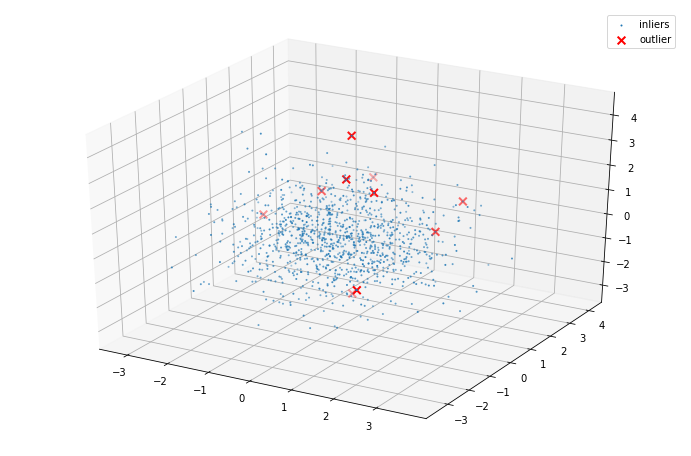

In [17]:
# Plot all the ground truth points together with the predictions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the compressed data points
ax.scatter(X_pca[:, 0], X_pca[:, 1], zs=X_pca[:, 2], s=4, lw=0, label="inliers")

# Plot x's for the ground truth outliers
ax.scatter(X_pca[y2 == 1, 0], X_pca[y2 == 1, 1], zs=X_pca[y2 == 1, 2],
           lw=2, s=60, marker="x", c="red", label="outlier")
ax.legend()


## Anomaly detection